<a href="https://colab.research.google.com/github/Gabrie345/Api-SpaceX-Java/blob/main/reconhecimento_racas_final_08_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.14.0


In [ ]:
# Pré-processamento de dados
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory('/content/Images', target_size=(256, 256), batch_size=32, class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_set = validation_datagen.flow_from_directory('/content/Images_validation', target_size=(256, 256), batch_size=32, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_set = test_datagen.flow_from_directory('/content/Images_teste', target_size=(256, 256), batch_size=32, class_mode='categorical')

Found 3717 images belonging to 21 classes.
Found 800 images belonging to 21 classes.
Found 800 images belonging to 21 classes.


In [ ]:
# Construção do Modelo CNN
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [ ]:
# ADD de Camadas Adicionais após camadas convolucionais
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))  # ajuste nas unidades para corresponder à complexidade adicionada pelas convoluções
model.add(Dropout(0.5))


model.add(Dense(units=21, activation='softmax'))

In [ ]:
# Compilação do Modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinamento do Modelo
history = model.fit(train_set, validation_data=validation_set, epochs=100, verbose=1)

Epoch 1/100
116/116 [==============================] - 85s 633ms/step - loss: 3.6812 - accuracy: 0.0638 - val_loss: 3.0140 - val_accuracy: 0.0824
Epoch 2/100
116/116 [==============================] - 72s 617ms/step - loss: 2.9659 - accuracy: 0.1004 - val_loss: 2.8395 - val_accuracy: 0.1461
Epoch 3/100
116/116 [==============================] - 72s 622ms/step - loss: 2.8538 - accuracy: 0.1355 - val_loss: 2.8308 - val_accuracy: 0.1548
Epoch 4/100
116/116 [==============================] - 72s 618ms/step - loss: 2.7572 - accuracy: 0.1609 - val_loss: 2.7075 - val_accuracy: 0.1685
Epoch 5/100
116/116 [==============================] - 73s 627ms/step - loss: 2.7161 - accuracy: 0.1758 - val_loss: 2.6957 - val_accuracy: 0.1810
Epoch 6/100
116/116 [==============================] - 72s 618ms/step - loss: 2.6447 - accuracy: 0.1853 - val_loss: 2.6415 - val_accuracy: 0.2022
Epoch 7/100
116/116 [==============================] - 71s 616ms/step - loss: 2.5685 - accuracy: 0.2159 - val_loss: 2.6164 -

In [ ]:
#Avaliação do Modelo

# Obter previsões do conjunto de teste
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

# Obter rótulos verdadeiros do conjunto de teste
true_classes = test_set.classes

# Calcular as métricas
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Acurácia: {round(accuracy, 2)}')
print(f'Precisão: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')
print(f'F1-Score: {round(f1, 2)}')

26/26 [==============================] - 11s 431ms/step
Acurácia: 0.78
Precisão: 0.65
Recall: 0.70
F1-Score: 0.73


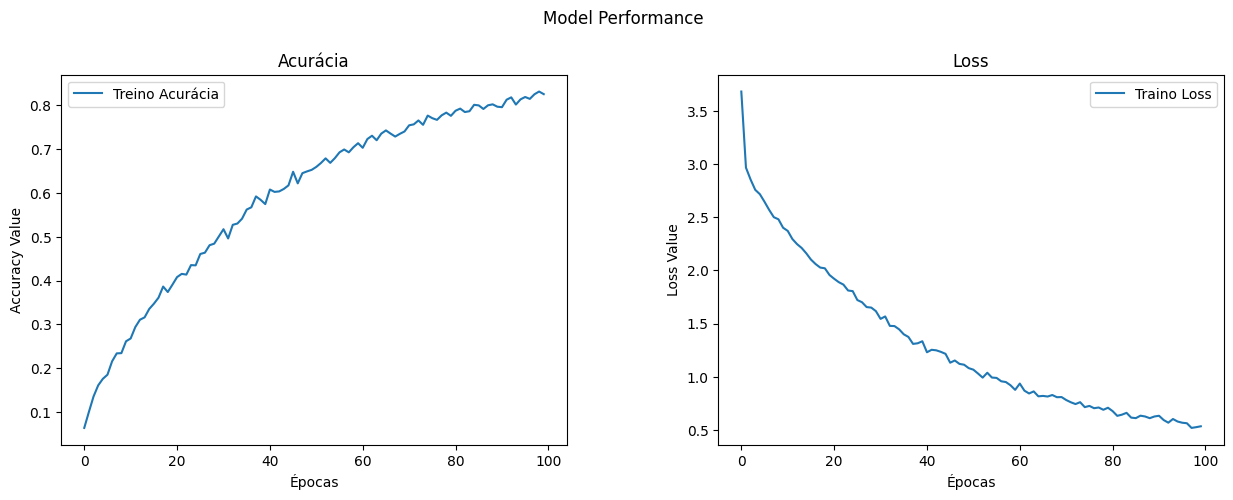

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history.history['accuracy'], label='Treino Acurácia')
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Épocas')
ax1.set_title('Acurácia')
l1 = ax1.legend(loc="best")

ax2.plot(history.history['loss'], label='Traino Loss')
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Épocas')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:

def predicao(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)

    class_indices = train_set.class_indices

    predicted_breed = [breed for breed, index in class_indices.items() if index == np.argmax(prediction)][0]
    img = image.load_img(image_path)
    img.show()

    print(f'A raça prevista é: {predicted_breed}')

In [ ]:
predicao(r'/content/teste_final/basset1.jpg')
predicao(r'/content/teste_final/basset2.jpg')
predicao(r'/content/teste_final/basset3.jpg')
predicao(r'/content/teste_final/basset4.jpg')
predicao(r'/content/teste_final/basset5.jpg')
predicao(r'/content/teste_final/basset6.jpg')
predicao(r'/content/teste_final/basset7.jpg')
predicao(r'/content/teste_final/basset8.jpg')
predicao(r'/content/teste_final/basset9.jpg')
predicao(r'/content/teste_final/basset10.jpg')

1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/beagle1.jpg')
predicao(r'/content/teste_final/beagle2.jpg')
predicao(r'/content/teste_final/beagle3.jpg')
predicao(r'/content/teste_final/beagle4.jpg')
predicao(r'/content/teste_final/beagle5.jpg')
predicao(r'/content/teste_final/beagle6.jpg')
predicao(r'/content/teste_final/beagle7.jpg')
predicao(r'/content/teste_final/beagle8.jpg')
predicao(r'/content/teste_final/beagle9.jpg')
predicao(r'/content/teste_final/beagle10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088364-beagle
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088364-beagle
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02088364-beagle
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088364-beagle
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088364-beagle
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi


In [ ]:
predicao(r'/content/teste_final/Blenheim_spaniel1.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel2.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel3.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel4.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel5.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel6.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel7.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel8.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel9.jpg')
predicao(r'/content/teste_final/Blenheim_spaniel10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02086646-Blenheim_spaniel


In [ ]:
predicao(r'/content/teste_final/bloodhound1.jpg')
predicao(r'/content/teste_final/bloodhound2.jpg')
predicao(r'/content/teste_final/bloodhound3.jpg')
predicao(r'/content/teste_final/bloodhound4.jpg')
predicao(r'/content/teste_final/bloodhound5.jpg')
predicao(r'/content/teste_final/bloodhound6.jpg')
predicao(r'/content/teste_final/bloodhound7.jpg')
predicao(r'/content/teste_final/bloodhound8.jpg')
predicao(r'/content/teste_final/bloodhound9.jpg')
predicao(r'/content/teste_final/bloodhound10.jpg')

1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088466-bloodhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088466-bloodhound
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02088466-bloodhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02086240-Shih-Tzu
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088466-bloodhound
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088466-bloodhound


In [ ]:
predicao(r'/content/teste_final/bluetick1.jpg')
predicao(r'/content/teste_final/bluetick2.jpg')
predicao(r'/content/teste_final/bluetick3.jpg')
predicao(r'/content/teste_final/bluetick4.jpg')
predicao(r'/content/teste_final/bluetick5.jpg')
predicao(r'/content/teste_final/bluetick6.jpg')
predicao(r'/content/teste_final/bluetick7.jpg')
predicao(r'/content/teste_final/bluetick8.jpg')
predicao(r'/content/teste_final/bluetick9.jpg')
predicao(r'/content/teste_final/bluetick10.jpg')

1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088632-bluetick
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02088632-bluetick
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088632-bluetick
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088632-bluetick
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02089078-coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088632-bluetick


In [ ]:
predicao(r'/content/teste_final/borzoi1.jpg')
predicao(r'/content/teste_final/borzoi2.jpg')
predicao(r'/content/teste_final/borzoi3.jpg')
predicao(r'/content/teste_final/borzoi4.jpg')
predicao(r'/content/teste_final/borzoi5.jpg')
predicao(r'/content/teste_final/borzoi6.jpg')
predicao(r'/content/teste_final/borzoi7.jpg')
predicao(r'/content/teste_final/borzoi8.jpg')
predicao(r'/content/teste_final/borzoi9.jpg')
predicao(r'/content/teste_final/borzoi10.jpg')

1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi


In [ ]:
predicao(r'/content/teste_final/chihuahua1.jpg')
predicao(r'/content/teste_final/chihuahua2.jpg')
predicao(r'/content/teste_final/chihuahua3.jpg')
predicao(r'/content/teste_final/chihuahua4.jpg')
predicao(r'/content/teste_final/chihuahua5.jpg')
predicao(r'/content/teste_final/chihuahua6.jpg')
predicao(r'/content/teste_final/chihuahua7.jpg')
predicao(r'/content/teste_final/chihuahua8.jpg')
predicao(r'/content/teste_final/chihuahua9.jpg')
predicao(r'/content/teste_final/chihuahua10.jpg')

1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi


In [ ]:
predicao(r'/content/teste_final/coonhound1.jpg')
predicao(r'/content/teste_final/coonhound2.jpg')
predicao(r'/content/teste_final/coonhound3.jpg')
predicao(r'/content/teste_final/coonhound4.jpg')
predicao(r'/content/teste_final/coonhound5.jpg')
predicao(r'/content/teste_final/coonhound6.jpg')
predicao(r'/content/teste_final/coonhound7.jpg')
predicao(r'/content/teste_final/coonhound8.jpg')
predicao(r'/content/teste_final/coonhound9.jpg')
predicao(r'/content/teste_final/coonhound10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02089078-coonhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089078-coonhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02089078-coonhound
1/1 [==============================] - 0s 21ms/step
A raça prevista é: n02089078-coonhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02089078-coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/English_foxhound1.jpg')
predicao(r'/content/teste_final/English_foxhound2.jpg')
predicao(r'/content/teste_final/English_foxhound3.jpg')
predicao(r'/content/teste_final/English_foxhound4.jpg')
predicao(r'/content/teste_final/English_foxhound5.jpg')
predicao(r'/content/teste_final/English_foxhound6.jpg')
predicao(r'/content/teste_final/English_foxhound7.jpg')
predicao(r'/content/teste_final/English_foxhound8.jpg')
predicao(r'/content/teste_final/English_foxhound9.jpg')
predicao(r'/content/teste_final/English_foxhound10.jpg')

1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086646-Blenheim_spaniel
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088632-bluetick
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088364-beagle
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/Galgo_afegao1.jpg')
predicao(r'/content/teste_final/Galgo_afegao2.jpg')
predicao(r'/content/teste_final/Galgo_afegao3.jpg')
predicao(r'/content/teste_final/Galgo_afegao4.jpg')
predicao(r'/content/teste_final/Galgo_afegao5.jpg')
predicao(r'/content/teste_final/Galgo_afegao6.jpg')
predicao(r'/content/teste_final/Galgo_afegao7.jpg')
predicao(r'/content/teste_final/Galgo_afegao8.jpg')
predicao(r'/content/teste_final/Galgo_afegao9.jpg')
predicao(r'/content/teste_final/Galgo_afegao10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088094-Galgo_afegao


In [ ]:
predicao(r'/content/teste_final/Japanese_spaniel1.jpg')
predicao(r'/content/teste_final/Japanese_spaniel2.jpg')
predicao(r'/content/teste_final/Japanese_spaniel3.jpg')
predicao(r'/content/teste_final/Japanese_spaniel4.jpg')
predicao(r'/content/teste_final/Japanese_spaniel5.jpg')
predicao(r'/content/teste_final/Japanese_spaniel6.jpg')
predicao(r'/content/teste_final/Japanese_spaniel7.jpg')
predicao(r'/content/teste_final/Japanese_spaniel8.jpg')
predicao(r'/content/teste_final/Japanese_spaniel9.jpg')
predicao(r'/content/teste_final/Japanese_spaniel10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088238-basset
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02088632-bluetick


In [ ]:
predicao(r'/content/teste_final/Lebrel_irlandes1.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes2.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes3.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes4.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes5.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes6.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes7.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes8.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes9.jpg')
predicao(r'/content/teste_final/Lebrel_irlandes10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090721-Lebrel_irlandes
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090721-Lebrel_irlandes
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090721-Lebrel_irlandes
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090721-Lebrel_irlandes


In [ ]:
predicao(r'/content/teste_final/Maltese_dog1.jpg')
predicao(r'/content/teste_final/Maltese_dog2.jpg')
predicao(r'/content/teste_final/Maltese_dog3.jpg')
predicao(r'/content/teste_final/Maltese_dog4.jpg')
predicao(r'/content/teste_final/Maltese_dog5.jpg')
predicao(r'/content/teste_final/Maltese_dog6.jpg')
predicao(r'/content/teste_final/Maltese_dog7.jpg')
predicao(r'/content/teste_final/Maltese_dog8.jpg')
predicao(r'/content/teste_final/Maltese_dog9.jpg')
predicao(r'/content/teste_final/Maltese_dog10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 20ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 21ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085936-Maltese_dog
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085936-Maltese_dog


In [ ]:
predicao(r'/content/teste_final/papillon1.jpg')
predicao(r'/content/teste_final/papillon2.jpg')
predicao(r'/content/teste_final/papillon3.jpg')
predicao(r'/content/teste_final/papillon4.jpg')
predicao(r'/content/teste_final/papillon5.jpg')
predicao(r'/content/teste_final/papillon6.jpg')
predicao(r'/content/teste_final/papillon7.jpg')
predicao(r'/content/teste_final/papillon8.jpg')
predicao(r'/content/teste_final/papillon9.jpg')
predicao(r'/content/teste_final/papillon10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02086910-papillon
1/1 [==============================] - 0s 20ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02086910-papillon
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086910-papillon
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086910-papillon
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel


In [ ]:
predicao(r'/content/teste_final/Pekinese1.jpg')
predicao(r'/content/teste_final/Pekinese2.jpg')
predicao(r'/content/teste_final/Pekinese3.jpg')
predicao(r'/content/teste_final/Pekinese4.jpg')
predicao(r'/content/teste_final/Pekinese5.jpg')
predicao(r'/content/teste_final/Pekinese6.jpg')
predicao(r'/content/teste_final/Pekinese7.jpg')
predicao(r'/content/teste_final/Pekinese8.jpg')
predicao(r'/content/teste_final/Pekinese9.jpg')
predicao(r'/content/teste_final/Pekinese10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02088094-Galgo_afegao
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02086079-Pekinese
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/Redbone_Coonhound1.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound2.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound3.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound4.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound5.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound6.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound7.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound8.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound9.jpg')
predicao(r'/content/teste_final/Redbone_Coonhound10.jpg')

1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/Shih-Tzu1.jpg')
predicao(r'/content/teste_final/Shih-Tzu2.jpg')
predicao(r'/content/teste_final/Shih-Tzu3.jpg')
predicao(r'/content/teste_final/Shih-Tzu4.jpg')
predicao(r'/content/teste_final/Shih-Tzu5.jpg')
predicao(r'/content/teste_final/Shih-Tzu6.jpg')
predicao(r'/content/teste_final/Shih-Tzu7.jpg')
predicao(r'/content/teste_final/Shih-Tzu8.jpg')
predicao(r'/content/teste_final/Shih-Tzu9.jpg')
predicao(r'/content/teste_final/Shih-Tzu10.jpg')

1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02086240-Shih-Tzu
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02086240-Shih-Tzu
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085782-Japanese_spaniel
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02086240-Shih-Tzu
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/toy_terrier1.jpg')
predicao(r'/content/teste_final/toy_terrier2.jpg')
predicao(r'/content/teste_final/toy_terrier3.jpg')
predicao(r'/content/teste_final/toy_terrier4.jpg')
predicao(r'/content/teste_final/toy_terrier5.jpg')
predicao(r'/content/teste_final/toy_terrier6.jpg')
predicao(r'/content/teste_final/toy_terrier7.jpg')
predicao(r'/content/teste_final/toy_terrier8.jpg')
predicao(r'/content/teste_final/toy_terrier9.jpg')
predicao(r'/content/teste_final/toy_terrier10.jpg')

1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02087046-toy_terrier
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02087046-toy_terrier
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02087046-toy_terrier
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087046-toy_terrier
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02087046-toy_terrier


In [ ]:
predicao(r'/content/teste_final/Walker_coonhound1.jpg')
predicao(r'/content/teste_final/Walker_coonhound2.jpg')
predicao(r'/content/teste_final/Walker_coonhound3.jpg')
predicao(r'/content/teste_final/Walker_coonhound4.jpg')
predicao(r'/content/teste_final/Walker_coonhound5.jpg')
predicao(r'/content/teste_final/Walker_coonhound6.jpg')
predicao(r'/content/teste_final/Walker_coonhound7.jpg')
predicao(r'/content/teste_final/Walker_coonhound8.jpg')
predicao(r'/content/teste_final/Walker_coonhound9.jpg')
predicao(r'/content/teste_final/Walker_coonhound10.jpg')

1/1 [==============================] - 0s 20ms/step
A raça prevista é: n02089867-Walker_coonhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02089973-English_foxhound
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087046-toy_terrier
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02090622-borzoi
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02089867-Walker_coonhound
1/1 [==============================] - 0s 17ms/step
A raça prevista é: n02085620-Chihuahua


In [ ]:
predicao(r'/content/teste_final/Rhodesian_ridgeback1.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback2.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback3.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback4.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback5.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback6.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback7.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback8.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback9.jpg')
predicao(r'/content/teste_final/Rhodesian_ridgeback10.jpg')

1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02090379-Redbone_Coonhound
1/1 [==============================] - 0s 19ms/step
A raça prevista é: n02087394-Rhodesian_ridgeback
1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 21ms/step
A raça prevista é: n02085620-Chihuahua
1/1 [==============================] - 0s 20ms/step
A raça prevista é: n02085620-Chihuahua


1/1 [==============================] - 0s 18ms/step
A raça prevista é: n02087046-toy_terrier


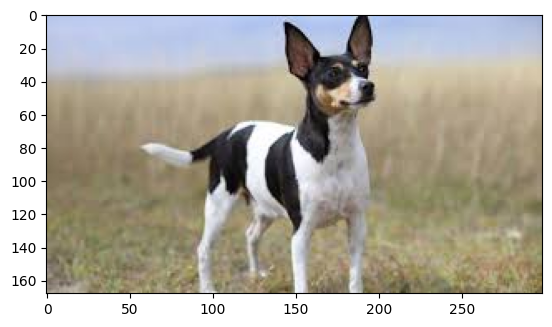

In [ ]:
# Exemplo de como fazer uma predição com uma imagem:

img_path = r'/content/teste_final/toy_terrier10.jpg'
img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255

prediction = model.predict(img)

class_indices = train_set.class_indices
predicted_breed = [breed for breed, index in class_indices.items() if index == np.argmax(prediction)][0]

img_show = plt.imread(r'/content/teste_final/toy_terrier10.jpg')
plt.imshow(img_show)
print(f'A raça prevista é: {predicted_breed}')